# Communicate Data Findings (Dataset: Loan Data from Prosper)

**By: Jalal Tareen**

### Overview
I looked at the characteristics of loans that could be used to predict their borrower APR in this investigation. Original loan amount, borrower's Prosper rating, loan term, borrower's stated monthly income were the main focus.

### Dataset Overview
The dataset consisted of borrower APRs and attributes of 113,937 loans. The attributes included original loan amount, borrower's Prosper rating, loan term, borrower's stated monthly income, as well as many other features such as borrower's employment status, debt to income ratio, current loan status etc. 352 data points were removed from the analysis due to very large stated monthly income seemed as outliers and missing borrower APR information.

In [1]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
%matplotlib inline
# suppress warnings from final output
import warnings
warnings.simplefilter("ignore")

In [2]:
# expand maximun number of columns and row dosplayed
pd.set_option('display.max_column',None)
pd.set_option('display.max_rows',None)

In [3]:
# load the raw dataset
df_loan = pd.read_csv('ProsperLoanData.csv')
df_loan.sample(10)

,ListingKey,ListingNumber,ListingCreationDate,CreditGrade,Term,LoanStatus,ClosedDate,BorrowerAPR,BorrowerRate,LenderYield,EstimatedEffectiveYield,EstimatedLoss,EstimatedReturn,ProsperRating (numeric),ProsperRating (Alpha),ProsperScore,ListingCategory (numeric),BorrowerState,Occupation,EmploymentStatus,EmploymentStatusDuration,IsBorrowerHomeowner,CurrentlyInGroup,GroupKey,DateCreditPulled,CreditScoreRangeLower,CreditScoreRangeUpper,FirstRecordedCreditLine,CurrentCreditLines,OpenCreditLines,TotalCreditLinespast7years,OpenRevolvingAccounts,OpenRevolvingMonthlyPayment,InquiriesLast6Months,TotalInquiries,CurrentDelinquencies,AmountDelinquent,DelinquenciesLast7Years,PublicRecordsLast10Years,PublicRecordsLast12Months,RevolvingCreditBalance,BankcardUtilization,AvailableBankcardCredit,TotalTrades,TradesNeverDelinquent (percentage),TradesOpenedLast6Months,DebtToIncomeRatio,IncomeRange,IncomeVerifiable,StatedMonthlyIncome,LoanKey,TotalProsperLoans,TotalProsperPaymentsBilled,OnTimeProsperPayments,ProsperPaymentsLessThanOneMonthLate,ProsperPaymentsOneMonthPlusLate,ProsperPrincipalBorrowed,ProsperPrincipalOutstanding,ScorexChangeAtTimeOfListing,LoanCurrentDaysDelinquent,LoanFirstDefaultedCycleNumber,LoanMonthsSinceOrigination,LoanNumber,LoanOriginalAmount,LoanOriginationDate,LoanOriginationQuarter,MemberKey,MonthlyLoanPayment,LP_CustomerPayments,LP_CustomerPrincipalPayments,LP_InterestandFees,LP_ServiceFees,LP_CollectionFees,LP_GrossPrincipalLoss,LP_NetPrincipalLoss,LP_NonPrincipalRecoverypayments,PercentFunded,Recommendations,InvestmentFromFriendsCount,InvestmentFromFriendsAmount,Investors
11005,A8D3353023865299629D980,536432,2011-10-30 22:50:50.890000000,NaN,36,Chargedoff,2013-06-18 00:00:00,0.29510,0.2599,0.2499,0.24370,0.1120,0.13170,3.0,D,6.0,3,CA,Other,Employed,13.0,False,False,NaN,2011-10-30 22:50:49,700.0,719.0,2001-02-12 00:00:00,2.0,2.0,9.0,4,339.0,2.0,6.0,0.0,0.0,10.0,0.0,0.0,7133.0,0.25,11785.0,8.0,0.62,1.0,0.19,"$25,000-49,999",True,2360.000000,08573635712074934141F27,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,387,20.0,28,56206,3000,2011-11-16 00:00:00,Q4 2011,DD9C35218693235583CC6D4,120.86,1842.0400,1079.04,763.0000,-28.78,-27.0,1920.96,1920.96,100.0,1.0,0,0,0.0,41
113583,D9383598728595152797428,1075651,2014-01-01 17:25:08.430000000,NaN,36,Current,NaN,0.19501,0.1585,0.1485,0.13953,0.0624,0.07713,4.0,C,4.0,1,NC,Teacher,Employed,365.0,True,False,NaN,2014-01-01 17:25:08,660.0,679.0,1981-03-31 00:00:00,3.0,3.0,22.0,2,28.0,1.0,1.0,4.0,0.0,2.0,1.0,0.0,985.0,0.65,515.0,18.0,0.88,1.0,0.07,"$25,000-49,999",True,4100.000000,94C7370231619232735EDEA,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,2,125130,7500,2014-01-09 00:00:00,Q1 2014,38323703244857400581615,263.12,259.8632,162.16,97.7032,-6.37,0.0,0.00,0.00,0.0,1.0,0,0,0.0,1
71150,82FB3557094004473C3DC74,631941,2012-08-31 17:34:05.737000000,NaN,36,Current,NaN,0.33665,0.2969,0.2869,0.27380,0.1475,0.12630,2.0,E,5.0,7,OR,Other,Employed,74.0,True,False,NaN,2012-08-31 17:34:03,760.0,779.0,2000-08-30 00:00:00,12.0,10.0,18.0,6,166.0,0.0,7.0,0.0,0.0,0.0,0.0,0.0,4038.0,0.89,263.0,17.0,1.00,0.0,0.23,"$50,000-74,999",True,4166.666667,649B3660517246126DE0E8A,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,18,73802,4000,2012-09-05 00:00:00,Q3 2012,868D3555869748206905906,169.13,2875.2100,1459.79,1415.4200,-47.66,0.0,0.00,0.00,0.0,1.0,0,0,0.0,11
100544,A59F358810701831335711D,880041,2013-08-26 11:17:36.220000000,NaN,36,Current,NaN,0.24246,0.2049,0.1949,0.18080,0.0824,0.09840,4.0,C,6.0,1,LA,Tradesman - Mechanic,Employed,32.0,False,False,NaN,2013-08-28 17:13:18,640.0,659.0,2006-08-30 00:00:00,9.0,7.0,15.0,7,299.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,5569.0,0.84,692.0,15.0,1.00,0.0,0.10,"$50,000-74,999",True,4583.333333,DFA43691523688268F55FA5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,6,100592,4000,2013-09-03 00:00:00,Q3 2013,24CE3587191178186CDDD40,149.65,895.6545,512.37,383.2845,-18.82,0.0,0.00,0.00,0.0,1.0,0,0,0.0,1
52958,59143597372257899E8B424,1045336,2013-12-11 09:45:22.303000000,NaN,60,Current,NaN,0.17327,0.1500,0.1400,0.13203,0.0574,0.0

In [4]:
df_loan.shape

(113937, 81)

In [5]:
df_loan.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 113937 entries, 0 to 113936
Data columns (total 81 columns):
 #   Column                               Non-Null Count   Dtype  
---  ------                               --------------   -----  
 0   ListingKey                           113937 non-null  object 
 1   ListingNumber                        113937 non-null  int64  
 2   ListingCreationDate                  113937 non-null  object 
 3   CreditGrade                          28953 non-null   object 
 4   Term                                 113937 non-null  int64  
 5   LoanStatus                           113937 non-null  object 
 6   ClosedDate                           55089 non-null   object 
 7   BorrowerAPR                          113912 non-null  float64
 8   BorrowerRate                         113937 non-null  float64
 9   LenderYield                          113937 non-null  float64
 10  EstimatedEffectiveYield              84853 non-null   float64
 11  EstimatedLoss

In [6]:
# view the statistics
df_loan.describe()

,ListingNumber,Term,BorrowerAPR,BorrowerRate,LenderYield,EstimatedEffectiveYield,EstimatedLoss,EstimatedReturn,ProsperRating (numeric),ProsperScore,ListingCategory (numeric),EmploymentStatusDuration,CreditScoreRangeLower,CreditScoreRangeUpper,CurrentCreditLines,OpenCreditLines,TotalCreditLinespast7years,OpenRevolvingAccounts,OpenRevolvingMonthlyPayment,InquiriesLast6Months,TotalInquiries,CurrentDelinquencies,AmountDelinquent,DelinquenciesLast7Years,PublicRecordsLast10Years,PublicRecordsLast12Months,RevolvingCreditBalance,BankcardUtilization,AvailableBankcardCredit,TotalTrades,TradesNeverDelinquent (percentage),TradesOpenedLast6Months,DebtToIncomeRatio,StatedMonthlyIncome,TotalProsperLoans,TotalProsperPaymentsBilled,OnTimeProsperPayments,ProsperPaymentsLessThanOneMonthLate,ProsperPaymentsOneMonthPlusLate,ProsperPrincipalBorrowed,ProsperPrincipalOutstanding,ScorexChangeAtTimeOfListing,LoanCurrentDaysDelinquent,LoanFirstDefaultedCycleNumber,LoanMonthsSinceOrigination,LoanNumber,LoanOriginalAmount,MonthlyLoanPayment,LP_CustomerPayments,LP_CustomerPrincipalPayments,LP_InterestandFees,LP_ServiceFees,LP_CollectionFees,LP_GrossPrincipalLoss,LP_NetPrincipalLoss,LP_NonPrincipalRecoverypayments,PercentFunded,Recommendations,InvestmentFromFriendsCount,InvestmentFromFriendsAmount,Investors
count,1.139370e+05,113937.000000,113912.000000,113937.000000,113937.000000,84853.000000,84853.000000,84853.000000,84853.000000,84853.000000,113937.000000,106312.000000,113346.000000,113346.000000,106333.000000,106333.000000,113240.000000,113937.00000,113937.000000,113240.000000,112778.000000,113240.000000,106315.000000,112947.000000,113240.000000,106333.000000,1.063330e+05,106333.000000,106393.000000,106393.000000,106393.000000,106393.000000,105383.000000,1.139370e+05,22085.000000,22085.000000,22085.000000,22085.000000,22085.000000,22085.000000,22085.000000,18928.000000,113937.000000,16952.000000,113937.000000,113937.000000,113937.00000,113937.000000,113937.000000,113937.000000,113937.000000,113937.000000,113937.000000,113937.000000,113937.000000,113937.000000,113937.000000,113937.000000,113937.000000,113937.000000,113937.000000
mean,6.278857e+05,40.830248,0.218828,0.192764,0.182701,0.168661,0.080306,0.096068,4.072243,5.950067,2.774209,96.071582,685.567731,704.567731,10.317192,9.260164,26.754539,6.96979,398.292161,1.435085,5.584405,0.592052,984.507059,4.154984,0.312646,0.015094,1.759871e+04,0.561309,11210.225447,23.230034,0.885897,0.802327,0.275947,5.608026e+03,1.421100,22.934345,22.271949,0.613629,0.048540,8472.311961,2930.313906,-3.223214,152.816539,16.268464,31.896882,69444.474271,8337.01385,272.475783,4183.079489,3105.536588,1077.542901,-54.725641,-14.242698,700.446342,681.420499,25.142686,0.998584,0.048027,0.023460,16.550751,80.475228
std,3.280762e+05,10.436212,0.080364,0.074818,0.074516,0.068467,0.046764,0.030403,1.673227,2.376501,3.996797,94.480605,66.458275,66.458275,5.457866,5.022644,13.637871,4.63097,447.159711,2.437507,6.429946,1.978707,7158.270157,10.160216,0.727868,0.154092,3.293640e+04,0.317918,19818.361309,11.871311,0.148179,1.097637,0.551759,7.478497e+03,0.764042,19.249584,18.830425,2.446827,0.556285,7395.507650,3806.635075,50.063567,466.320254,9.005898,29.974184,38930.479610,6245.80058,192.697812,4790.907234,4069.527670,1183.414168,60.675425,109.232758,2388.513831,2357.167068,275.657937,0.017919,0.332353,0.232412,294.545422,103.239020
min,4.000000e+00,12.000000,0.006530,0.000000,-0.010000,-0.182700,0.004900,-0.182700,1.000000,1.000000,0.000000,0.000000,0.000000,19.000000,0.000000,0.000000,2.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-209.000000,0.000000,0.000000,0.000000,1.000000,1000.00000,0.000000,-2.349900,0.000000,-2.349900,-664.870000,-9274.750000,-94.200000,-954.550000,0.000000,0.700000,0.000000,0.000000,0.000000,1.000000
25%,4.009190e+05,36.000000

In [7]:
# see number of duplicated data entries
sum(df_loan.duplicated())

0

In [8]:
# see number of null values on each columns
df_loan.isnull().sum()

ListingKey                                  0
ListingNumber                               0
ListingCreationDate                         0
CreditGrade                             84984
Term                                        0
LoanStatus                                  0
ClosedDate                              58848
BorrowerAPR                                25
BorrowerRate                                0
LenderYield                                 0
EstimatedEffectiveYield                 29084
EstimatedLoss                           29084
EstimatedReturn                         29084
ProsperRating (numeric)                 29084
ProsperRating (Alpha)                   29084
ProsperScore                            29084
ListingCategory (numeric)                   0
BorrowerState                            5515
Occupation                               3588
EmploymentStatus                         2255
EmploymentStatusDuration                 7625
IsBorrowerHomeowner               

In [9]:
# filter out loans without ProsperScores
df_loan_2 = df_loan[df_loan['ProsperScore'].isnull()==False]

In [10]:
# Subset the dataframe by selecting features of interest
cols = ['LoanOriginalAmount', 'BorrowerAPR', 'StatedMonthlyIncome', 'Term', 'ProsperRating (Alpha)', 
        'EmploymentStatus']
loan_sub = df_loan[cols]

In [11]:
# descriptive statistics for numeric variables
loan_sub.describe()

,LoanOriginalAmount,BorrowerAPR,StatedMonthlyIncome,Term
count,113937.00000,113912.000000,1.139370e+05,113937.000000
mean,8337.01385,0.218828,5.608026e+03,40.830248
std,6245.80058,0.080364,7.478497e+03,10.436212
min,1000.00000,0.006530,0.000000e+00,12.000000
25%,4000.00000,0.156290,3.200333e+03,36.000000
50%,6500.00000,0.209760,4.666667e+03,36.000000
75%,12000.00000,0.283810,6.825000e+03,36.000000
max,35000.00000,0.512290,1.750003e+06,60.000000


In [12]:
# Remove loans with missing borrower APR information
loan_sub = loan_sub[~loan_sub.BorrowerAPR.isna()]

### Structure of Dataset:
The dataset contains 113937 loans with 81 features (including LoanOriginalAmount, BorrowerAPR, StatedMonthlyIncome, Term, ProsperRating (Alpha), EmploymentStatus and many others)

### Main Features of interest in Dataset:
I'm most interested in figureing out what features are best for predicting the borrower's Annual Percentage Rate (APR) for the loan.

### Features in the Dataset For Investigation:
I expect that the total loan amount will have a negative effect on the APR of the loan: the larger the total loan amount, the lower the APR. I also think that the borrowers stated monthly income, loan term, Prosper rating, employment status will also have effects on the APR.

### Prosper Rating Explained:
Every loan listing is assigned a Prosper Rating through bank proprietary rating system, which allows bank to maintain consistency in their evaluation. The Prosper Rating is expressed as a letter grade that indicates the expected level of risk associated with a loan listing.  Each letter grade corresponds to an estimated average annualized loss rate range.
It starts from AA(lowest Risk) till HR(high risk)

 
### Univariate Exploration
I'll start by looking at the distribution of the main variable of interest: borrower APR.

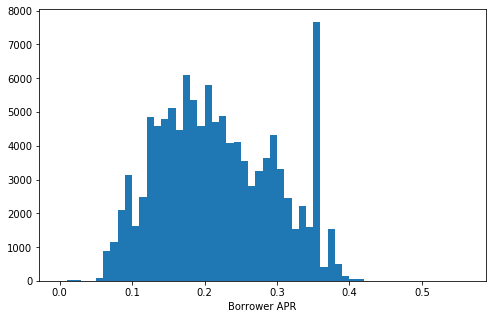

In [13]:
bins = np.arange(0, loan_sub.BorrowerAPR.max()+0.05, 0.01)
plt.figure(figsize=[8, 5])
plt.hist(data = loan_sub, x = 'BorrowerAPR', bins = bins);
plt.xlabel('Borrower APR');

The distribution of APR looks multimodal. It has small peak centered at 0.1 and 0.3, a large peak centered at 0.2.There is a sharpe peak between 0.35 and 0.36. We can see only few loans have APR greater than 0.43.

In [14]:
# Check loans with APR greater than 0.43
loan_sub[loan_sub.BorrowerAPR>0.43]

,LoanOriginalAmount,BorrowerAPR,StatedMonthlyIncome,Term,ProsperRating (Alpha),EmploymentStatus
18326,3000,0.45857,10000.000000,36,NaN,NaN
22195,1789,0.46201,2916.666667,36,NaN,NaN
36018,1500,0.51229,2838.000000,36,NaN,NaN
56761,3000,0.50633,0.000000,36,NaN,NaN
82043,3000,0.48873,1583.333333,36,NaN,NaN
103973,2800,0.45857,3750.000000,36,NaN,NaN


The 6 borrowers with largest APR have small loan amount and don't have records of Prosper rating and employment status.

Next up, look at the distribution of the first predictor variable of interest: LoanOriginalAmount

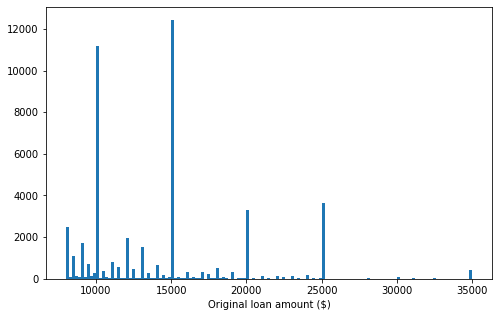

In [15]:
bins = np.arange(8000, loan_sub.LoanOriginalAmount.max()+200, 200)
plt.figure(figsize=[8, 5])
plt.hist(data = loan_sub, x = 'LoanOriginalAmount', bins = bins);
plt.xlabel('Original loan amount ($)');

From the graph above we can see that the most loans are multiples of 1k, Frequency of multiples of 5k loans are much more than others.

Now, look at the distributions of other variables of interest: stated monthly income

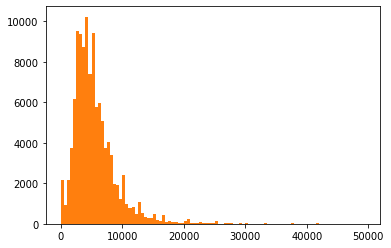

In [16]:
# Distribution of stated monthly income
bins_smi = np.arange(0, 50000, 500)
plt.hist(data = loan_sub, x = 'StatedMonthlyIncome', bins=bins_smi);# Distribution of stated monthly income
bins_smi = np.arange(0, 50000, 500)
plt.hist(data = loan_sub, x = 'StatedMonthlyIncome', bins=bins_smi);

The distribution of stated monthly income is severely right screwed, with most of stated monthly income less than 30k.

In [17]:
# Check borrowers with stated monthly income greater than 1e5
loan_sub[loan_sub.StatedMonthlyIncome>1e5]

,LoanOriginalAmount,BorrowerAPR,StatedMonthlyIncome,Term,ProsperRating (Alpha),EmploymentStatus
8066,2000,0.35643,4.166667e+05,36,HR,Employed
8870,12500,0.12700,2.083333e+05,36,NaN,Not available
17411,7500,0.35643,4.833333e+05,36,E,Employed
35218,1000,0.07389,1.083333e+05,36,AA,Full-time
45028,4000,0.33973,1.500000e+05,36,E,Self-employed
53014,4000,0.25785,6.185478e+05,12,D,Self-employed
53167,4000,0.35797,1.750003e+06,36,HR,Self-employed
56867,25000,0.11144,1.850818e+05,36,NaN,Self-employed
57133,4000,0.35643,4.666667e+05,36,E,Employed
59298,15000,0.24246,1.208333e+05,36,C,Self-employed


In [18]:
# Get percent of borrowers whose stated monthly income greater than 30k
(loan_sub.StatedMonthlyIncome>30000).sum()/float(loan_sub.shape[0])

0.0028706369829341947

Less than 0.3 percent borrowers have stated monthly income greater than 30k, these can be seemed as outlier for the following analysis, so it is better to remove borrower records with income greater than 30k.

In [19]:
# remove loans with stated monthly income greater than 30k, which are outliers
loan_sub = loan_sub[loan_sub.StatedMonthlyIncome<=30000]

In [20]:
(loan_sub.StatedMonthlyIncome>30000).sum()

0


Look at distributions of term, Prosper rating and employment status

In [21]:
# Convert ProsperRating and Employment status into ordered categorical types
rate_order = ['HR','E','D','C','B','A','AA']
ordered_var = pd.api.types.CategoricalDtype(ordered = True,
                                    categories = rate_order)
loan_sub['ProsperRating (Alpha)'] = loan_sub['ProsperRating (Alpha)'].astype(ordered_var)

emp_order = ['Employed','Self-employed','Full-time','Part-time','Retired','Other','Not employed', 'Not available']
ordered_var = pd.api.types.CategoricalDtype(ordered = True,
                                    categories = emp_order)
loan_sub['EmploymentStatus'] = loan_sub['EmploymentStatus'].astype(ordered_var)

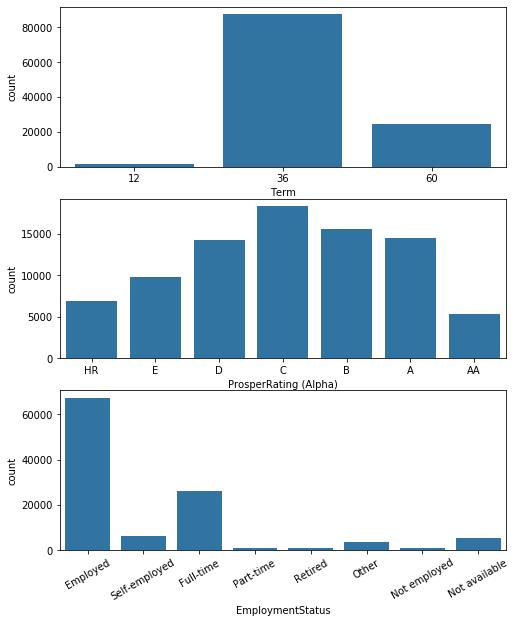

In [22]:
fig, ax = plt.subplots(nrows=3, figsize = [8,10])
default_color = sb.color_palette()[0]
sb.countplot(data = loan_sub, x = 'Term', color = default_color, ax = ax[0])
sb.countplot(data = loan_sub, x = 'ProsperRating (Alpha)', color = default_color, ax = ax[1])
sb.countplot(data = loan_sub, x = 'EmploymentStatus', color = default_color, ax = ax[2]);
plt.xticks(rotation=30);

The length of most of the loans are 36 months. The ratings of most of the borrowers are among D to A. Most of borrowers are employed and full-time.


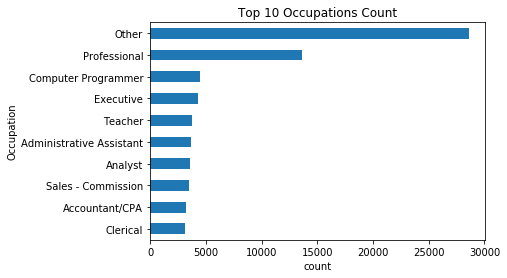

In [23]:
# see the top 10 occupations of borrowers
df_loan['Occupation'].value_counts()[9::-1].plot(kind='barh')
plt.title('Top 10 Occupations Count')
plt.xlabel('count')
plt.ylabel('Occupation')
plt.fontsize = 12
plt.figsize=(12,12)

Top 10 Occupations Count: most borrowers enter their occupations as "others" or "professional" because they might not want to share this information. The rest of the occupations do not show big increase compare to others.

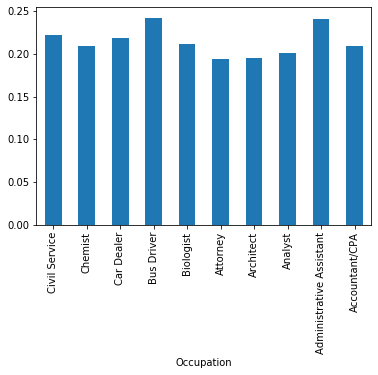

In [24]:
# bar plot for APR means for each top 10 occupations.
Top_Occupation = df_loan.groupby('Occupation').BorrowerAPR.mean()[9::-1]
Top_Occupation.plot(kind = 'bar');

**Top 10 Occupations Count:** It is interesting to find out who the top occupations are. But all these occupations have about same BorrowerAPR values. Therefore occupation is not the best factor to analyze the BorrowerAPR, because it is unclear and many other reasons should also be considers to be analyzed.

### Distribution(s) of the variable(s) of interest:

The distribution of borrowers APR looks multimodal. Most of the values are at the range of 0.05 and 0.4. There are no unusual points and no need to perform any transformations.

### Unusual distributions and Cleaning:

The distributions of stated monthly income is highly right screwed. Most stated monthly incomes are less than 30k, but some of them are incredibly high, like greater than 100k. Surprisingly, most of borrowers with greater than 100k monthly income only loan less than 5k dollars. So, the very large stated monthly income may be made up. Overall, Less than 0.3 percent borrowers have stated monthly income greater than 30k, these can be seemed as outlier for the following analysis, so it is better to remove borrower records with income greater than 30k.

There is no need to perform any transformations.


### Bivariate Exploration
To start off with, I want to look at the pairwise correlations present between features in the data.

In [25]:
num_vars = ['LoanOriginalAmount', 'BorrowerAPR', 'StatedMonthlyIncome']
cat_vars = ['Term', 'ProsperRating (Alpha)', 'EmploymentStatus']

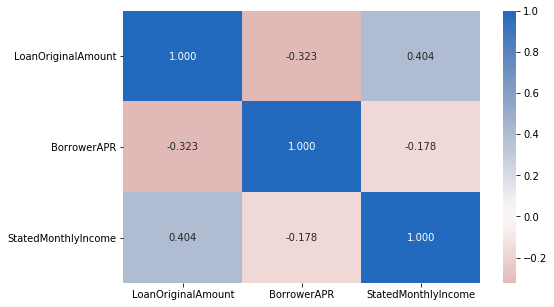

In [26]:
# correlation plot
plt.figure(figsize = [8, 5])
sb.heatmap(loan_sub[num_vars].corr(), annot = True, fmt = '.3f',
           cmap = 'vlag_r', center = 0);

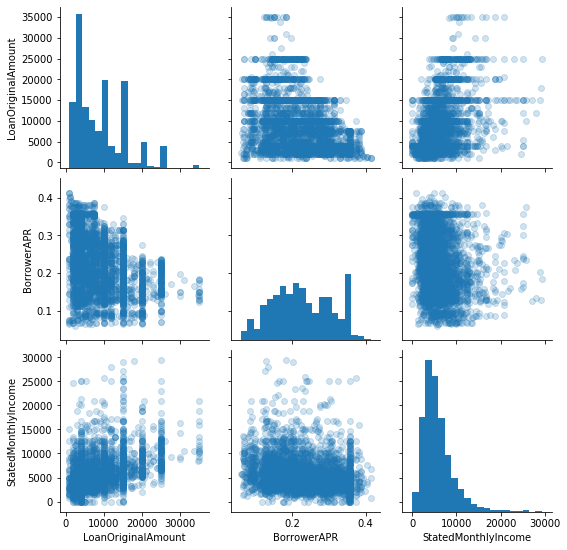

In [27]:
# plot matrix: sample 5000 loans so that plots are clearer and render faster
loan_sub_samp = loan_sub.sample(5000)
g = sb.PairGrid(data = loan_sub_samp.dropna(), vars = num_vars)
g = g.map_diag(plt.hist, bins=20)
g.map_offdiag(plt.scatter, alpha=0.2);

The correlation coefficient of borrower APR and loan original amount is -0.323, the scatter plot also shows that these two variables are negatively correlated, which agrees with our hypothesis, that is the more the loan amount, the lower the APR. The loan original amount is positively correlated with the stated monthly income, it makes sense since borrowers with more monthly income could loan more money.

Let's move on to looking at how borrower APR, stated monthly income and loan original amount correlate with the categorical variables.

<Figure size 720x720 with 0 Axes>

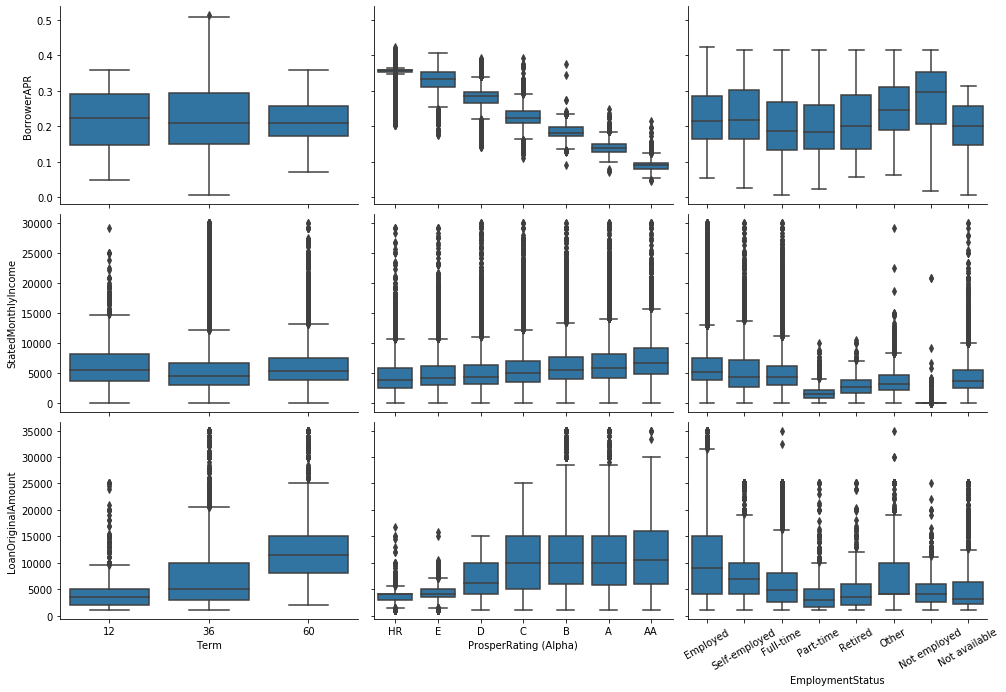

In [28]:
# plot matrix of numeric features against categorical features.

def boxgrid(x, y, **kwargs):
    """ Quick hack for creating box plots with seaborn's PairGrid. """
    default_color = sb.color_palette()[0]
    sb.boxplot(x, y, color = default_color)

plt.figure(figsize = [10, 10])
g = sb.PairGrid(data = loan_sub, y_vars = ['BorrowerAPR', 'StatedMonthlyIncome', 'LoanOriginalAmount'], 
                x_vars = cat_vars, size = 3, aspect = 1.5)
g.map(boxgrid);
plt.xticks(rotation=30);

The figure shows that the loan amount is increased with the increase of loan term. The borrower APR decreases with the better rating. Borrowers with the best Prosper ratings have the lowest APR. It means that the Prosper rating has a strong effect on borrower APR. Borrowers with better rating also have larger monthly income and loan amount. Employed, self-employed and full time borrowers have more monthly income and loan amount than part-time, retired and not employed borrowers.

Finally, let's look at relationships between the three categorical features.

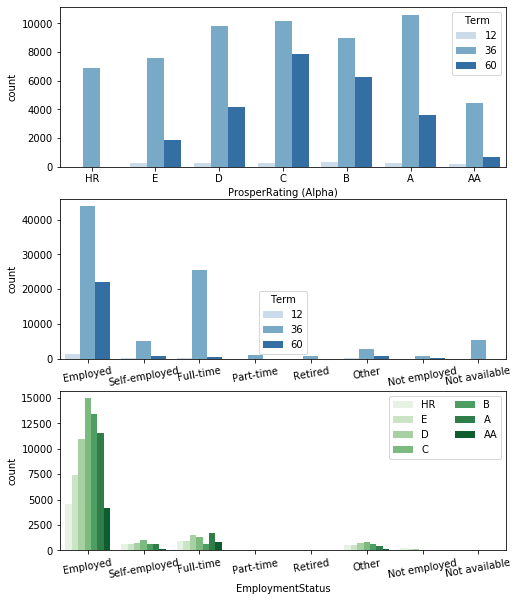

In [29]:
plt.figure(figsize = [8, 10])

# subplot 1: Prosper rating vs term
plt.subplot(3, 1, 1)
sb.countplot(data = loan_sub, x = 'ProsperRating (Alpha)', hue = 'Term', palette = 'Blues')

# subplot 2: employment status vs. term
ax = plt.subplot(3, 1, 2)
sb.countplot(data = loan_sub, x = 'EmploymentStatus', hue = 'Term', palette = 'Blues')
plt.xticks(rotation=10)

# subplot 3: Prosper rating vs. employment status, use different color palette
ax = plt.subplot(3, 1, 3)
sb.countplot(data = loan_sub, x = 'EmploymentStatus', hue = 'ProsperRating (Alpha)', palette = 'Greens')
ax.legend(loc = 1, ncol = 2); # re-arrange legend to remove overlapping
plt.xticks(rotation=10);

The employment status variable do not have enough data on part-time, retired and not employed borrowers to show its interaction with term and Prosper rating variables. But we can see that there is a interaction between term and Prosper rating. Proportionally, there are more 60 month loans on B and C ratings. There is only 36 months loans for HR rating borrowers.

With the preliminary look at bivariate relationships out of the way, I want to see how borrower APR and loan original amount are related to one another for all of the data.

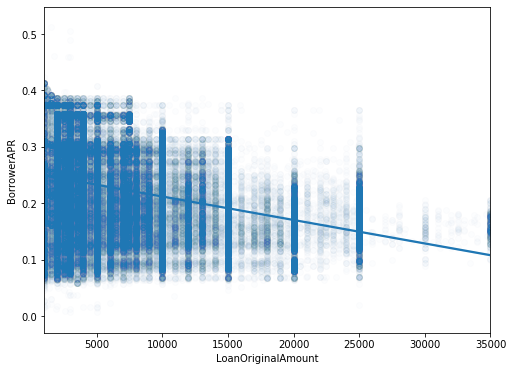

In [30]:
plt.figure(figsize = [8, 6])
sb.regplot(data = loan_sub, x = 'LoanOriginalAmount', y = 'BorrowerAPR', scatter_kws={'alpha':0.01});

This plot shows that at different size of the loan amount, the APR has a large range, but the range of APR decrease with the increase of loan amount. Overall, the borrower APR is negatively correlated with loan amount.

### Relationships Observed in Investigation:

The borrower APR is negatively associated with the loan original amount, which mean the more the loan amount, the lower the APR. It also shows that at different size of the loan amount, the APR has a large range, but the range of APR decrease with the increase of loan amount. The Prosper rating also has a strong effect on the borrower APR, which decreases with the better rating.

### Interesting relationships between the other features:
The loan original amount is positively correlated with the stated monthly income, it makes sense since borrowers with more monthly income could loan more money. It also shows that borrowers with better rating also have larger monthly income and loan amount. There is a interaction between prosper rating and term. Proportionally, there are more 60 month loans on B and C ratings. There is only 36 months loans for HR rating borrowers.

### Multivariate Exploration:
The main thing I want to explore in this part of the analysis is how the categorical variable (Prosper rating and term) play into the relationship between borrower APR and loan original amount.

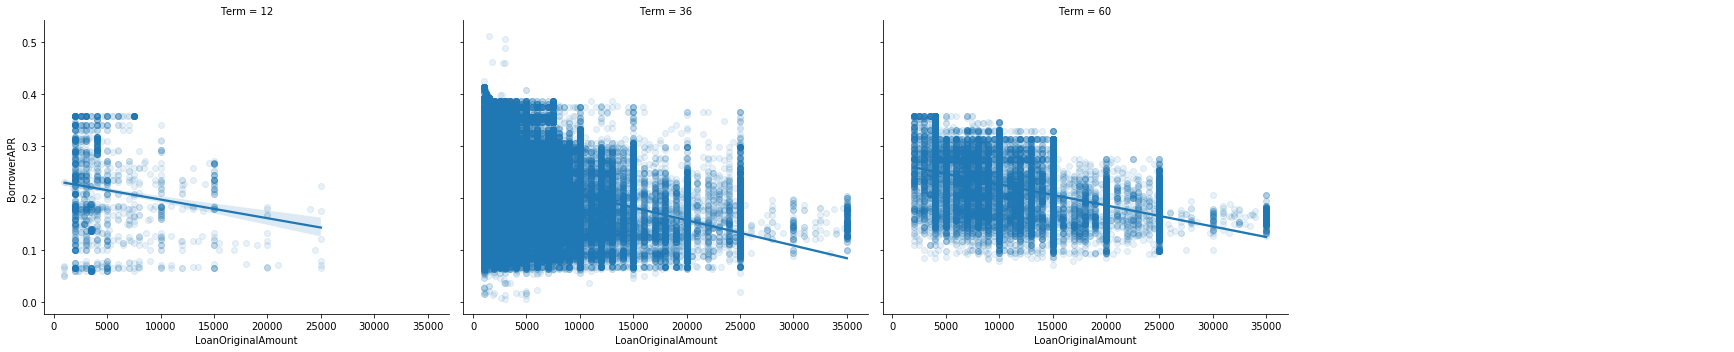

In [31]:
# Term effect on relationship of APR and loan amount
g=sb.FacetGrid(data=loan_sub, aspect=1.2, height=5, col='Term', col_wrap=4)
g.map(sb.regplot, 'LoanOriginalAmount', 'BorrowerAPR', x_jitter=0.04, scatter_kws={'alpha':0.1});
g.add_legend();

Term doesn't seem to have effect on relationship of APR and loan amount

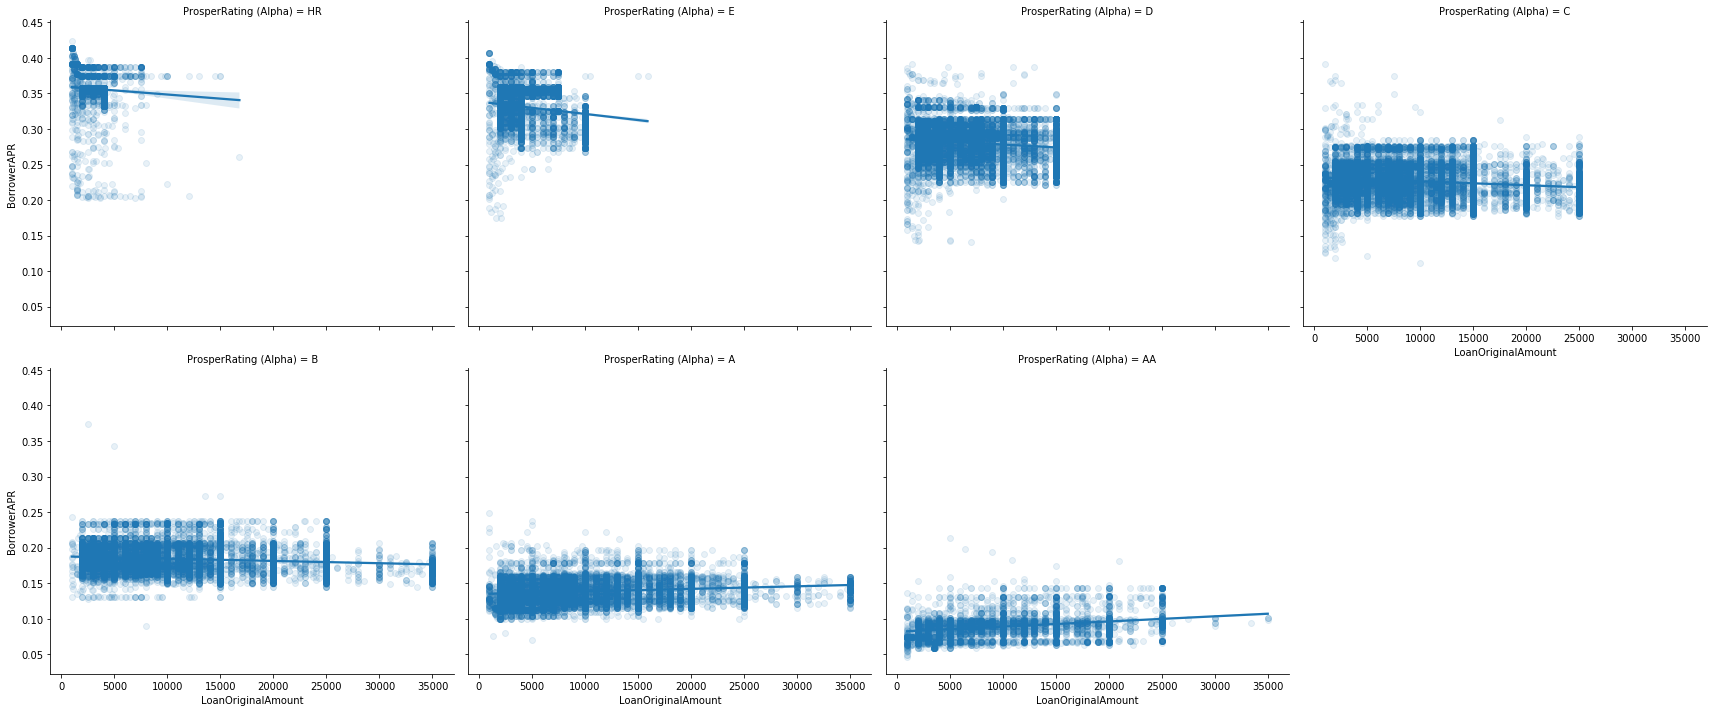

In [32]:
# Prosper rating effect on relationship of APR and loan amount
g=sb.FacetGrid(data=loan_sub, aspect=1.2, height=5, col='ProsperRating (Alpha)', col_wrap=4)
g.map(sb.regplot, 'LoanOriginalAmount', 'BorrowerAPR', x_jitter=0.04, scatter_kws={'alpha':0.1});
g.add_legend();


The loan amount increases with better rating. The borrower APR decreases with better rating. Interestingly, the relationship between borrower APR and loan amount turns from negative to slightly positive when the Prosper ratings are increased from HR to A or better. This may because people with A or AA ratings tend to borrow more money, increasting APR could prevent them borrow even more and maximize the profit. But people with lower ratings tend to borrow less money, decreasing APR could encourage them to borrow more.

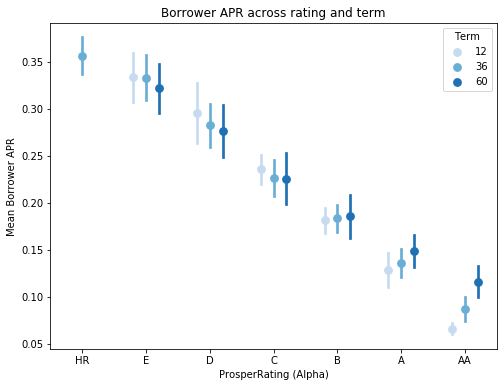

In [33]:
fig = plt.figure(figsize = [8,6])
ax = sb.pointplot(data = loan_sub, x = 'ProsperRating (Alpha)', y = 'BorrowerAPR', hue = 'Term',
           palette = 'Blues', linestyles = '', dodge = 0.4, ci='sd')
plt.title('Borrower APR across rating and term')
plt.ylabel('Mean Borrower APR')
ax.set_yticklabels([],minor = True);

Interestingly, the borrower APR decrease with the increase of borrow term for people with HR-C raings. But for people with B-AA ratings, the APR increase with the increase of borrow term.

Then, look at the rating and term effects on stated monthly income and loan original amount variables

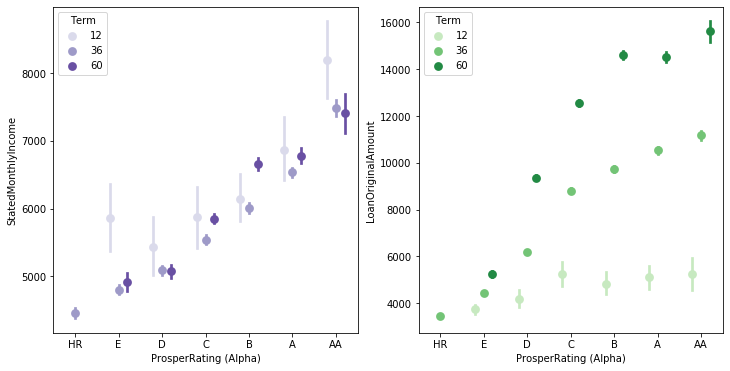

In [34]:
fig, ax = plt.subplots(ncols=2, figsize=[12,6])
sb.pointplot(data = loan_sub, x = 'ProsperRating (Alpha)', y = 'StatedMonthlyIncome', hue = 'Term',
           palette = 'Purples', linestyles = '', dodge = 0.4, ax=ax[0])
sb.pointplot(data = loan_sub, x = 'ProsperRating (Alpha)', y = 'LoanOriginalAmount', hue = 'Term',
           palette = 'Greens', linestyles = '', dodge = 0.4, ax=ax[1]);


For stated monthly income, it doesn't seem like there is a interaction effect between term and rating, the pattern of term is similar among different ratings. But for loan amount, there is a interaction between term and rating. We can see that with better Prosper rating, the loan amount of all three terms increases, the increase amplitude of loan amount between terms also becomes larger.

### Findings:

I extended my investigation of borrower APR against loan amount by looking at the impact of the Prosper rating. The multivariate exploration showed that the relationship between borrower APR and loan amount turns from negative to slightly positive when the Prosper ratings increased from HR to AA. 

### Interesting or surprising Interactions between features:
A surprising interaction is that the borrower APR and loan amount is negatively correlated when the Prosper ratings are from HR to B, but the correlation is turned to be positive when the ratings are A and AA. Another interesting thing is that the borrower APR decrease with the increase of borrow term for people with HR ratings. But for people with AA ratings, the APR increase with the borrow term.